In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "rajanpuri" # username from the json file
os.environ['KAGGLE_KEY'] = "bf4e2652a89f13d502d899a57f88e717" # key from the json file
#!kaggle datasets download -d gpiosenka/100-bird-species
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.35G/1.37G [00:16<00:00, 65.8MB/s]
100% 1.37G/1.37G [00:16<00:00, 87.3MB/s]


In [ ]:
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/SUPERB STARLING/069.jpg  
  inflating: train/SUPERB STARLING/070.jpg  
  inflating: train/SUPERB STARLING/071.jpg  
  inflating: train/SUPERB STARLING/072.jpg  
  inflating: train/SUPERB STARLING/073.jpg  
  inflating: train/SUPERB STARLING/074.jpg  
  inflating: train/SUPERB STARLING/075.jpg  
  inflating: train/SUPERB STARLING/076.jpg  
  inflating: train/SUPERB STARLING/077.jpg  
  inflating: train/SUPERB STARLING/078.jpg  
  inflating: train/SUPERB STARLING/079.jpg  
  inflating: train/SUPERB STARLING/080.jpg  
  inflating: train/SUPERB STARLING/081.jpg  
  inflating: train/SUPERB STARLING/082.jpg  
  inflating: train/SUPERB STARLING/083.jpg  
  inflating: train/SUPERB STARLING/084.jpg  
  inflating: train/SUPERB STARLING/085.jpg  
  inflating: train/SUPERB STARLING/086.jpg  
  inflating: train/SUPERB STARLING/087.jpg  
  inflating: train/SUPERB STARLING/088.jpg  
  inflating: train/SUPERB STARLING/089.jpg  
  in

In [ ]:
for i in os.listdir('/content/consolidated'):
  print(i)


YELLOW HEADED BLACKBIRD
ROUGH LEG BUZZARD
RED WINGED BLACKBIRD
BOBOLINK
PEACOCK
VARIED THRUSH
CACTUS WREN
ELLIOTS  PHEASANT
INDIGO BUNTING
BLACKBURNIAM WARBLER
SAND MARTIN
ANTBIRD
NORTHERN FLICKER
ASIAN CRESTED IBIS
GREEN JAY
MYNA
GREY PLOVER
EMU
WHIMBREL
EASTERN MEADOWLARK
CRESTED AUKLET
HORNED SUNGEM
ALEXANDRINE PARAKEET
DOWNY WOODPECKER
BLUE GROUSE
PEREGRINE FALCON
NORTHERN RED BISHOP
AFRICAN FIREFINCH
LILAC ROLLER
TRUMPTER SWAN
GRAY CATBIRD
BLACK FRANCOLIN
GOLDEN PHEASANT
RING-NECKED PHEASANT
TREE SWALLOW
SORA
GYRFALCON
EVENING GROSBEAK
NICOBAR PIGEON
TAIWAN MAGPIE
SHOEBILL
CROW
EASTERN TOWEE
ARARIPE MANAKIN
ANNAS HUMMINGBIRD
BROWN THRASHER
RED HONEY CREEPER
NORTHERN GOSHAWK
CANARY
HOOPOES
EURASIAN MAGPIE
ANHINGA
CURL CRESTED ARACURI
TEAL DUCK
TURKEY VULTURE
ROSY FACED LOVEBIRD
VIOLET GREEN SWALLOW
OCELLATED TURKEY
BARN SWALLOW
COMMON STARLING
GOLDEN EAGLE
AMERICAN AVOCET
COUCHS KINGBIRD
OSPREY
BALD EAGLE
CUBAN TODY
PHILIPPINE EAGLE
JABIRU
QUETZAL
VERMILION FLYCATHER
COMMON HOUSE M

In [ ]:
train=os.listdir('train')
test=os.listdir('test')
valid=os.listdir('valid')

print(len(train))
print(len(test))
print(len(valid))

225
225
225


In [ ]:
for i in train:
  path= "train/" + i
  print(i,len(os.listdir(path)))

YELLOW HEADED BLACKBIRD 159
ROUGH LEG BUZZARD 127
RED WINGED BLACKBIRD 127
BOBOLINK 157
PEACOCK 156
VARIED THRUSH 193
CACTUS WREN 122
ELLIOTS  PHEASANT 148
INDIGO BUNTING 147
BLACKBURNIAM WARBLER 134
SAND MARTIN 95
ANTBIRD 150
NORTHERN FLICKER 139
ASIAN CRESTED IBIS 105
GREEN JAY 156
MYNA 141
GREY PLOVER 120
EMU 106
WHIMBREL 138
EASTERN MEADOWLARK 190
CRESTED AUKLET 106
HORNED SUNGEM 126
ALEXANDRINE PARAKEET 165
DOWNY WOODPECKER 127
BLUE GROUSE 185
PEREGRINE FALCON 126
NORTHERN RED BISHOP 135
AFRICAN FIREFINCH 140
LILAC ROLLER 138
TRUMPTER SWAN 137
GRAY CATBIRD 155
BLACK FRANCOLIN 131
GOLDEN PHEASANT 107
RING-NECKED PHEASANT 97
TREE SWALLOW 181
SORA 300
GYRFALCON 124
EVENING GROSBEAK 144
NICOBAR PIGEON 129
TAIWAN MAGPIE 136
SHOEBILL 175
CROW 107
EASTERN TOWEE 127
ARARIPE MANAKIN 105
ANNAS HUMMINGBIRD 139
BROWN THRASHER 99
RED HONEY CREEPER 132
NORTHERN GOSHAWK 112
CANARY 160
HOOPOES 125
EURASIAN MAGPIE 155
ANHINGA 147
CURL CRESTED ARACURI 137
TEAL DUCK 159
TURKEY VULTURE 149
ROSY FACED

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

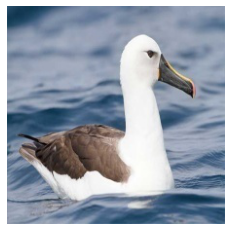

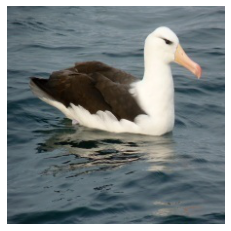

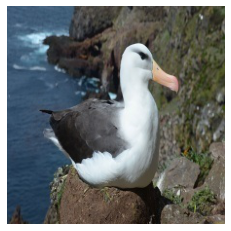

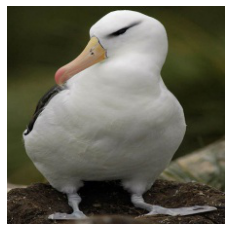

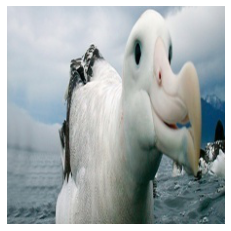

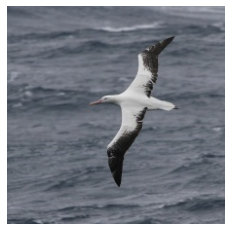

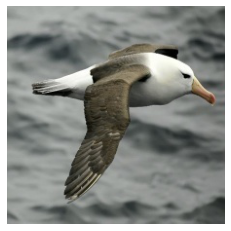

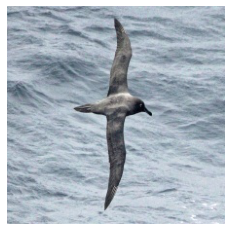

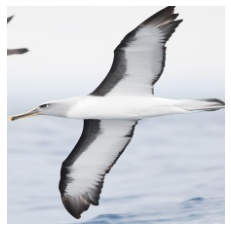

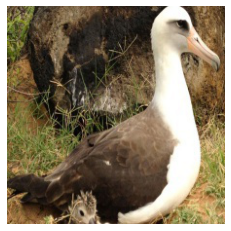

In [ ]:
x=os.listdir('/content/train/ALBATROSS/')
for i in x[:10]:
  img=image.load_img('/content/train/ALBATROSS/'+i)
  img=image.img_to_array(img)
  img=img/255.0
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
        rescale=(1/255.0),
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training=train_gen.flow_from_directory(
    "train",
    target_size=(64,64),
    class_mode='categorical',
     batch_size=64
)
val_gen=ImageDataGenerator(rescale=1/255.0)
val=val_gen.flow_from_directory(
    "valid",
    target_size=(64,64),
    class_mode="categorical",
    batch_size=64
)
test= ImageDataGenerator(rescale=1/255.0)
testing=test.flow_from_directory(
    "test",
    target_size=(64,64),
    class_mode="categorical",
    batch_size=64
)

Found 31316 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.


In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16 
from keras.layers import *


In [ ]:
model1=VGG16(include_top=False,weights = 'imagenet',input_shape=(64,64,3))
model1.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
______________________________________________________________

In [ ]:
for i in range(len(model1.layers)):
  print(i,model1.layers[i])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f619ee04e48>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f619f1e5f28>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f619c9fc748>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f619c9fcb00>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f619adab7f0>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f619adc7668>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f619adc7710>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f619adcc2b0>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f619adcceb8>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f619add2550>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f619add24e0>
11 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f619add9908>
12 <tensorflow.python.ke

In [ ]:
for i in range(len(model1.layers)):
  model1.layers[i].trainable=False
model1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [ ]:
av= GlobalAveragePooling2D()(model1.output)
av1 = Dense(1024,activation = 'relu')(av)
av2=Dropout(0.2)(av1)
av3=Dense(225,activation='softmax')(av2)
model_new = Model( inputs = model1.input, outputs = av3)
model_new.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 65, 65, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 32, 32, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 32, 32, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________

In [ ]:
from keras.optimizers import Adam
adam = Adam(lr=0.001)
model_new.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
#each epoch take 20 mins 

In [ ]:
from keras.callbacks import  EarlyStopping, ModelCheckpoint
filepath='/content/drive/My Drive/PROJECTS/birds/model_birds_vgg.hdf5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callback = EarlyStopping(monitor='val_loss', patience=2)
call = [checkpoint, callback]
his = model_new.fit_generator(training,epochs=100,validation_data=val,callbacks = call)

Epoch 1/100
490/490 [==============================] - ETA: 0s - loss: 3.5027 - accuracy: 0.2483
Epoch 00001: val_loss improved from inf to 2.21704, saving model to /content/drive/My Drive/PROJECTS/birds/model_birds_vgg.hdf5
490/490 [==============================] - 70s 142ms/step - loss: 3.5027 - accuracy: 0.2483 - val_loss: 2.2170 - val_accuracy: 0.4516
Epoch 2/100
490/490 [==============================] - ETA: 0s - loss: 2.5276 - accuracy: 0.3953
Epoch 00002: val_loss improved from 2.21704 to 1.98991, saving model to /content/drive/My Drive/PROJECTS/birds/model_birds_vgg.hdf5
490/490 [==============================] - 71s 146ms/step - loss: 2.5276 - accuracy: 0.3953 - val_loss: 1.9899 - val_accuracy: 0.5129
Epoch 3/100
490/490 [==============================] - ETA: 0s - loss: 2.2635 - accuracy: 0.4476
Epoch 00003: val_loss improved from 1.98991 to 1.85795, saving model to /content/drive/My Drive/PROJECTS/birds/model_birds_vgg.hdf5
490/490 [==============================] - 71s 14

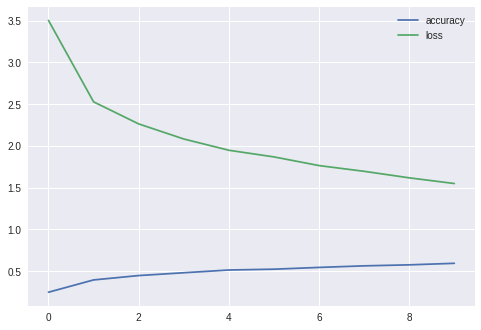

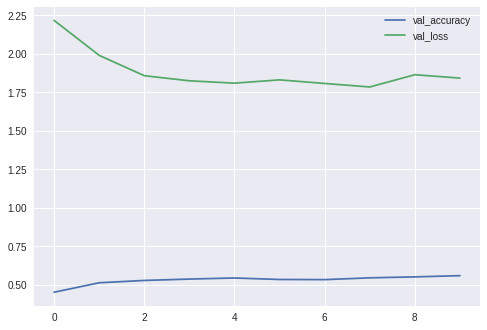

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(his.history['accuracy'],label='accuracy')
plt.plot(his.history['loss'],label='loss')
plt.legend()
plt.show()
plt.plot(his.history['val_accuracy'],label='val_accuracy')
plt.plot(his.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
model_new.evaluate(training)

490/490 [==============================] - 67s 136ms/step - loss: 1.3753 - accuracy: 0.7122


[1.3752708435058594, 0.7122237682342529]

In [ ]:
model_new.evaluate(testing)

18/18 [==============================] - 1s 70ms/step - loss: 1.3093 - accuracy: 0.7431


[1.309335708618164, 0.7431111335754395]

In [ ]:
model_new.save_weights('/content/drive/My Drive/PROJECTS/birds/model.h5')

In [ ]:
model_json = model_new.to_json()


with open("/content/drive/My Drive/PROJECTS/birds/model.json", "w") as json_file:
    json_file.write(model_json)

##VGG PROVIDED 75.3% ACCURACY

In [ ]:

from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Model
model1=MobileNetV2(include_top=False,weights = 'imagenet',input_shape=(64,64,3))
model1.summary()

from keras.layers import *
av1= GlobalAveragePooling2D()(model1.output)
av=Dropout(0.2)(av1)
av4=Dense(225,activation='softmax')(av)
model_new=Model(input=model1.input,output=av4)
model_new.summary()

from keras.optimizers import Adam

adam=Adam()
model_new.compile(optimizer=adam,loss="categorical_crossentropy",metrics=['accuracy'])

for i in range(len(model_new.layers)):
  print(i,model_new.layers[i])

for i in range(151):
  model_new.layers[i].trainable=False

model_new.compile(optimizer=adam,loss="categorical_crossentropy",metrics=['accuracy'])
model_new.summary()

history=model_new.fit_generator(training,epochs=20,validation_data=validation)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

his=model_new.fit_generator(training,epochs=12)

model_new.evaluate(training)

model_new.evaluate(testing,verbose=0)



Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 65, 65, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 32, 32, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 32, 32, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

TypeError: ignored

In [ ]:

from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Model
model1=MobileNetV2(include_top=False, weights = "imagenet" ,input_shape=(64,64,3))

model1.summary()

for i in range(len(model1.layers)):
  model1.layers[i].trainable=False

from keras.layers import *
av= GlobalAveragePooling2D()(model1.output)
av1 = Dense(512, activation='relu')(av)
av2=Dropout(0.2)(av1)
av4=Dense(225,activation='softmax')(av2)
model_=Model(inputs = model1.input, outputs = av4)
model_.summary()

for i in range(len(model_.layers)):
  print(i,model_.layers[i])



Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 65, 65, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 32, 32, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 32, 32, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
model_.compile(optimizer=adam,loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
from keras.callbacks import  EarlyStopping, ModelCheckpoint
filepath='/content/drive/My Drive/PROJECTS/birds/model_bird_Mobilenet_1.hdf5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callback = EarlyStopping(monitor='val_loss', patience=2)
call = [checkpoint, callback]
his = model_new.fit_generator(training,epochs=100,validation_data=val,callbacks = call)

Epoch 1/100
490/490 [==============================] - ETA: 0s - loss: 0.3351 - accuracy: 0.9019
Epoch 00001: val_loss improved from inf to 1.18485, saving model to /content/drive/My Drive/PROJECTS/birds/model_bird_Mobilenet_1.hdf5
490/490 [==============================] - 75s 152ms/step - loss: 0.3351 - accuracy: 0.9019 - val_loss: 1.1848 - val_accuracy: 0.7618
Epoch 2/100
490/490 [==============================] - ETA: 0s - loss: 0.3273 - accuracy: 0.9027
Epoch 00002: val_loss did not improve from 1.18485
490/490 [==============================] - 75s 153ms/step - loss: 0.3273 - accuracy: 0.9027 - val_loss: 1.6737 - val_accuracy: 0.6987
Epoch 3/100
490/490 [==============================] - ETA: 0s - loss: 0.3044 - accuracy: 0.9091
Epoch 00003: val_loss did not improve from 1.18485
490/490 [==============================] - 74s 151ms/step - loss: 0.3044 - accuracy: 0.9091 - val_loss: 1.4931 - val_accuracy: 0.7129


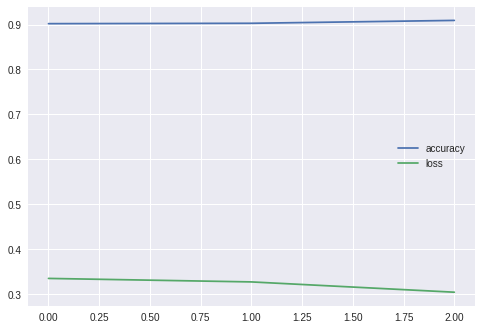

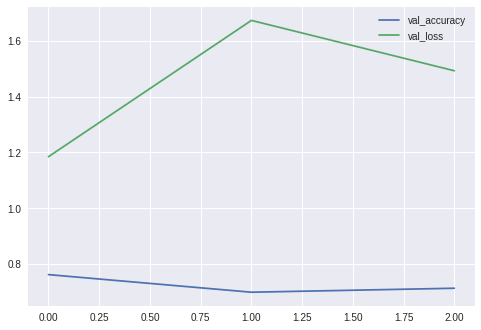

In [ ]:
plt.plot(his.history['accuracy'],label='accuracy')
plt.plot(his.history['loss'],label='loss')
plt.legend()
plt.show()
plt.plot(his.history['val_accuracy'],label='val_accuracy')
plt.plot(his.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
print("Training: ",model_new.evaluate(training))
print("testing: ", model_new.evaluate(testing))

490/490 [==============================] - 67s 137ms/step - loss: 1.1113 - accuracy: 0.7643
Training:  [1.111303448677063, 0.7642738819122314]
18/18 [==============================] - 1s 74ms/step - loss: 1.4152 - accuracy: 0.7591
testing:  [1.4152004718780518, 0.7591111063957214]


In [ ]:
model_json_mobile = model_new.to_json()


with open("/content/drive/My Drive/PROJECTS/birds/model_mobile_net_1.json", "w") as json_file:
    json_file.write(model_json_mobile)